In [ ]:
!pip install -q transformers datasets torch pandas scikit-learn openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd

# Load dataset from Google Colab
file_path = "/content/cleaned_reviews_zappos.xlsx"
df = pd.read_excel(file_path)

# Display basic information
print("✅ Dataset Loaded. Summary:")
print(df.info())

# Show first few rows
df.head()


✅ Dataset Loaded. Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              2959 non-null   object
 1   model              2959 non-null   object
 2   price              2959 non-null   object
 3   Ratings            2959 non-null   int64 
 4   processed_reviews  2959 non-null   object
 5   Sentiment          2959 non-null   object
dtypes: int64(1), object(5)
memory usage: 138.8+ KB
None


,brand,model,price,Ratings,processed_reviews,Sentiment
0,Hey Dude,Wally Linen Natural,$64.99,5,bought son love wear almost everi day definit ...,Positive
1,Hey Dude,Wally Linen Natural,$64.99,5,get lot compliment,Positive
2,Hey Dude,Wally Linen Natural,$64.99,5,love dude,Positive
3,Hey Dude,Wally Linen Natural,$64.99,5,love,Positive
4,Hey Dude,Wally Linen Natural,$64.99,5,probabl favorit,Positive


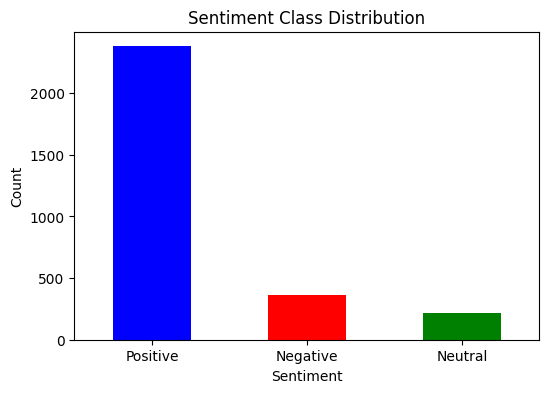

Sentiment
Positive    2380
Negative     364
Neutral      215
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each sentiment class
sentiment_counts = df["Sentiment"].value_counts()

# Plot class distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["blue", "red", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Class Distribution")
plt.xticks(rotation=0)
plt.show()

# Print actual counts
print(sentiment_counts)


In [ ]:
import torch
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Encode sentiment labels
label_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
df["Sentiment_encoded"] = df["Sentiment"].map(label_mapping)

# Compute class weights
class_weights = compute_class_weight("balanced", classes=np.unique(df["Sentiment_encoded"]), y=df["Sentiment_encoded"])
class_weights = torch.tensor(class_weights, dtype=torch.float)

print("✅ Computed Class Weights:", class_weights)

✅ Computed Class Weights: tensor([2.7097, 4.5876, 0.4144])


In [ ]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df["processed_reviews"], df["Sentiment_encoded"], test_size=0.2, random_state=42, stratify=df["Sentiment_encoded"]
)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize text data
def tokenize_text(text_series):
    return tokenizer(
        text_series.tolist(),
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )

train_encodings = tokenize_text(X_train)
test_encodings = tokenize_text(X_test)

# Convert labels to lists
y_train = y_train.tolist()
y_test = y_test.tolist()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset

# Define PyTorch dataset class
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

# Create datasets
train_dataset = SentimentDataset(train_encodings, y_train)
test_dataset = SentimentDataset(test_encodings, y_test)

# Verify dataset sizes
print("✅ Number of training samples:", len(train_dataset))
print("✅ Number of test samples:", len(test_dataset))


✅ Number of training samples: 2367
✅ Number of test samples: 592


In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils import resample
import pandas as pd

# Step 1: Separate classes
positive_df = df[df["Sentiment_encoded"] == 2]  # Positive
neutral_df = df[df["Sentiment_encoded"] == 1]   # Neutral
negative_df = df[df["Sentiment_encoded"] == 0]  # Negative

# Step 2: Upsample Neutral and Negative
neutral_upsampled = resample(neutral_df, replace=True, n_samples=1000, random_state=42)
negative_upsampled = resample(negative_df, replace=True, n_samples=1000, random_state=42)

# Step 3: Combine and shuffle
balanced_df = pd.concat([positive_df, neutral_upsampled, negative_upsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Redefine splits using balanced_df
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer

X_train, X_test, y_train, y_test = train_test_split(
    balanced_df["processed_reviews"], balanced_df["Sentiment_encoded"],
    test_size=0.2, random_state=42, stratify=balanced_df["Sentiment_encoded"]
)

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_text(text_series):
    return tokenizer(
        text_series.tolist(),
        padding=True,
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )

train_encodings = tokenize_text(X_train)
test_encodings = tokenize_text(X_test)

y_train = y_train.tolist()
y_test = y_test.tolist()

from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

train_dataset = SentimentDataset(train_encodings, y_train)
test_dataset = SentimentDataset(test_encodings, y_test)

# Load pre-trained BERT model for classification (3 classes)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Define Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0, reduction="mean"):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = nn.functional.cross_entropy(inputs, targets, weight=self.alpha, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (1 - pt) ** self.gamma * ce_loss

        if self.reduction == "mean":
            return focal_loss.mean()
        elif self.reduction == "sum":
            return focal_loss.sum()
        else:
            return focal_loss

# Define custom Trainer with Focal Loss and class weighting
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits

        loss_fct = FocalLoss(alpha=class_weights.to(logits.device), gamma=2.0)
        loss = loss_fct(logits, labels)

        return (loss, outputs) if return_outputs else loss

# Define evaluation metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# Set up training arguments
training_args = TrainingArguments(
    output_dir="/content/results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3.719431256376107e-05,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="/content/logs",
    logging_steps=500,
    fp16=True,
    save_total_limit=1,
    disable_tqdm=False,
    report_to="none"
)

# Initialize Trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
metrics = trainer.evaluate()
print("\u2705 Evaluation Metrics:", metrics)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.806850,0.658676,0.821056,0.658676,0.677705
2,0.886700,0.193044,0.886986,0.898407,0.886986,0.887317
3,0.270700,0.212802,0.924658,0.928000,0.924658,0.924970
4,0.066500,0.221675,0.940639,0.941205,0.940639,0.940710


✅ Evaluation Metrics: {'eval_loss': 0.22167527675628662, 'eval_accuracy': 0.9406392694063926, 'eval_precision': 0.9412054910325253, 'eval_recall': 0.9406392694063926, 'eval_f1': 0.9407101444073409, 'eval_runtime': 624.2927, 'eval_samples_per_second': 1.403, 'eval_steps_per_second': 0.176, 'epoch': 4.0}


📋 Classification Report:
              precision    recall  f1-score   support

    Negative     0.9347    0.9300    0.9323       200
     Neutral     0.9100    0.9600    0.9343       200
    Positive     0.9571    0.9370    0.9469       476

    accuracy                         0.9406       876
   macro avg     0.9339    0.9423    0.9379       876
weighted avg     0.9412    0.9406    0.9407       876



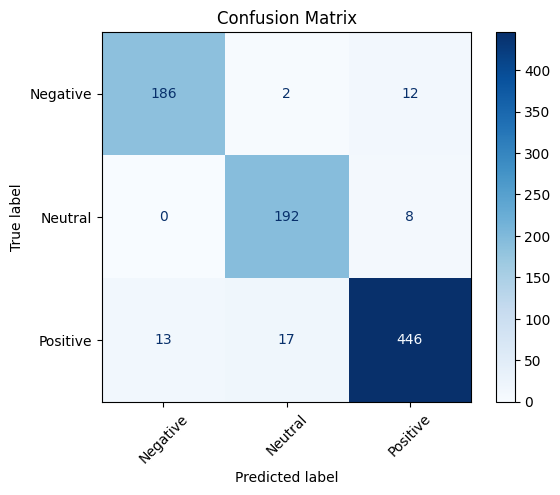

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions on the evaluation dataset
predictions = trainer.predict(test_dataset)
y_true = predictions.label_ids
y_pred = predictions.predictions.argmax(-1)

# Define class labels
target_names = ["Negative", "Neutral", "Positive"]

# Print classification report
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

# Create and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues", values_format="d")
plt.xticks(rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
trainer.save_model("/content/final_model")
tokenizer.save_pretrained("/content/final_model")

('/content/final_model/tokenizer_config.json',
 '/content/final_model/special_tokens_map.json',
 '/content/final_model/vocab.txt',
 '/content/final_model/added_tokens.json')

In [ ]:
!zip -r final_model.zip /content/final_model

  adding: content/final_model/ (stored 0%)
  adding: content/final_model/tokenizer_config.json (deflated 75%)
  adding: content/final_model/training_args.bin (deflated 52%)
  adding: content/final_model/vocab.txt (deflated 53%)
  adding: content/final_model/model.safetensors (deflated 7%)
  adding: content/final_model/special_tokens_map.json (deflated 42%)
  adding: content/final_model/config.json (deflated 51%)


In [ ]:
from google.colab import files
files.download("final_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>